# **Topics to be discussed**


1.   Maximum likelihood estimate for Normal distribution
2.   Biasedness in estimating parameters of Normal distribution.
3.   Sampling Univariate Normal by Box-Müller Transform.
4.   Why do we need normalization constant for normal distribution?



# **Maximum likelihood estimate for Normal distribution**


---
## **What is likelihood?**

Likelihood is the probability of observed data occuring given parameter $θ$ of the choosen statistical model.

\begin{equation}
Likelihood =\mathcal{L}(θ;D) =P(D;\theta)
\end{equation}
## **What is MLE ?**

In maximum likelihood estimation, we estimate the values of parameters for which likelihood function maximize.

\begin{equation}
MLE=\hat{\theta} = {argmax}\ \mathcal{L_n}(\theta;D)\ \ \ \ \ \ \ \ where\ \theta\epsilon\Theta
\end{equation}




## **What is MLE for Normal distribution**

Let us consider a dataset X = {$x_1$, $x_2$, ......,$x_n$ }


Also, $X \sim \mathcal{N}(\mu,\sigma^{2})\$

### **Likelihood for normal distribution**

\begin{equation}
\mathcal{L}(\theta;X) = \prod_{i=0}^{n-1} p(X = x_i;\theta)
\end{equation}

where $\theta$ = [$\mu$, $\sigma$]

Where $p(X = x_i;\theta)$ is PDF or PMF of the distribution.

#### **For Normal distribution PDF is**

\begin{equation}
P(x;\theta) = \frac1{\sqrt{2\pi\sigma^2}}{exp}^\frac{(x_i-\mu)^2}{-2\sigma^2}
\end{equation}



#### **Continuing on likelihood for normal distribution**

Let us say we have observed some data $D = [x_0,x_1...x_n ]$

\begin{equation}
\mathcal{L}(\theta;X) =\ P(D;\theta)\ = \prod_{i=0}^{n-1}  \frac1{\sqrt{2\pi\sigma^2}}{exp}^\frac{(x_{i}-\mu)^2}{-2\sigma^2}
\end{equation}

\begin{equation}
\mathcal{L}(\theta;X) = (\frac1{\sqrt{2\pi\sigma^2}})^{n} {exp}^\frac{\sum_{i=0}^{i=n-1}(x_i-\mu)^2}{-2\sigma^2}
\end{equation}

#### **Log likelihood**

\begin{equation}
\mathcal{l}(\theta;X) = log\ \mathcal{L}(\theta;X)
\end{equation}

\begin{equation}
\mathcal{l}(\theta;X) = n\ log(\frac1{\sqrt{2\pi\sigma^2}})-\frac{\sum_{i=0}^{i=n-1}(x_i-\mu)^2}{2\sigma^2}
\end{equation}

## **Now we will find MLE for normal distribution**

We will now partially differentiate last equation with respect to $\theta$ which consist of [$\mu$, $\sigma$] and set it to 0

\begin{equation}
\frac{\partial\mathcal{l(\theta};D)}{\partial\mu} =\frac{\partial}{\partial\mu} (n\ log(\frac1{\sqrt{2\pi\sigma^2}})-\frac{\sum_{i=0}^{i=n-1}(x_i-\mu)^2}{2\sigma^2}) = 0
\end{equation}

\begin{equation}
\mu_{mle} = \frac{\sum_{i=0}^{n-1}(x_i)}{n}
\end{equation}



\begin{equation}
\frac{\partial\mathcal{l(\theta};D)}{\partial\sigma} =\frac{\partial}{\partial\sigma} (n\ log(\frac1{\sqrt{2\pi\sigma^2}})-\frac{\sum_{i=0}^{i=n-1}(x_i-\mu)^2}{2\sigma^2}) = 0
\end{equation}



\begin{equation}
\sigma_{mle} = \sqrt{\frac{\sum_{i=0}^{n-1}(x_i-\mu_{mle})^2}{n}}
\end{equation}

## **Key Takeways**

If given a dataset {$x_0$,$x_1$,$x_2$,$x_3$......$x_n$} and you want to fit a univariate normal over it then your best bet will be on the following values. 

1.$\mu_{mle}$ = $\frac{\sum_{i=0}^{n-1}(x_i)}{n}$

2.$\sigma_{mle}$ = $\sqrt{\frac{\sum_{i=0}^{n-1}(x_i-\mu_{mle})^2}{n}}$



In [1]:
try:
  import distrax
except:
  %pip install -qq distrax
  import distrax
try:
    import seaborn as sns
except:
    %pip install seaborn
    import seaborn as sns
try:
  import jax
  import jax.numpy as jnp
except:
  %pip install -qq jax
  import jax
  import jax.numpy as jnp

try:
  import matplotlib.pyplot as plt
except:
  %pip install -qq matplotlib
  import matplotlib.pyplot as plt

try:
  import optax
except:
  %pip install -qq optax
  import optax

In [3]:
key = jax.random.PRNGKey(5)
mu_true = 3.0
sigma_true = 1.5
normal = distrax.Normal(loc = mu_true, scale = sigma_true)
dataset = normal.sample(seed = key, sample_shape=(50,))
dataset

DeviceArray([3.92603   , 3.9767542 , 3.558783  , 3.0179455 , 1.3739038 ,
             3.6095047 , 2.4973936 , 3.649794  , 5.748624  , 4.8349547 ,
             3.91154   , 3.9340787 , 2.2267294 , 1.6969573 , 5.0541067 ,
             5.352936  , 1.4028751 , 4.5072684 , 5.1001005 , 3.4607863 ,
             5.5017376 , 2.122274  , 0.86931944, 2.9107697 , 0.7332144 ,
             5.7931714 , 1.9632198 , 1.5772264 , 4.7388873 , 5.389656  ,
             5.958115  , 1.3539832 , 4.759739  , 3.1171305 , 3.2148287 ,
             1.4764075 , 3.763061  , 3.5909772 , 4.746722  , 2.59665   ,
             5.4242697 , 5.4669795 , 1.3547294 , 4.5743384 , 3.7063255 ,
             2.7989883 , 3.8633423 , 3.6925926 , 3.1226122 , 1.3622106 ],            dtype=float32)

In [4]:
mu_mle = jnp.mean(dataset)
sigma_mle = jnp.sqrt(jnp.mean((dataset-mu_mle)**2))
print(f"Theoretical value of mu and sigma is {mu_mle} {sigma_mle}")

Theoretical value of mu and sigma is 3.4876906871795654 1.463478446006775


### Let us calculate values for $\mu$ and $\sigma$ by auto differentiation

In [6]:
def loss(theta, samples):
  normal = distrax.Normal(loc = theta[0], scale = theta[1])
  return -jnp.sum(normal.log_prob(samples))

In [7]:
def fit(theta,optimizer,n_itr):
  opt_state = optimizer.init(theta)
  def step(theta,opt_state,samples):
    loss_value, grads = jax.value_and_grad(loss)(theta,samples)
    updates, opt_state = optimizer.update(grads,opt_state,theta)
    theta = optax.apply_updates(theta,updates)
    return theta, opt_state, loss_value

  for i in range(n_itr):
    theta,opt_state,loss_value = step(theta, opt_state,dataset)
  return theta

optimizer = optax.adam(learning_rate= 1e-1)
theta_init = jnp.array([10.0,14.0])
theta = fit(theta_init,optimizer,n_itr = 400)
print(f"Value of mu and sigma by auto differentition is {theta[0]} {theta[1]}")

Value of mu and sigma by auto differentition is 3.4876909255981445 1.4634785652160645



# **What is Estimator?** 

An estimator is a rule or function for calculating an estimate of the parameters for the given distribution based on observed data.

For eg . 
\begin{equation}
\mu_{mle} = \frac{\sum_{i=0}^{n-1}(x_i)}{n}\ \ \ is\ an\ estimator\ for\ the\  dataset\ {x_0,x_1,x_2,x_3.....,x_n}.
\end{equation}


# **What is Unbiasedness ?**

Estimator is unbiased if the **expected value of the estimator matches** that of the parameter

E[$\mu_{mle}]$ = $\mu_{true}$ = $E[X]$to become unbiased. 



## **Two big statements**


1.   $\mu_{mle}$ is an unbiased estimator.
2.   $\sigma_{mle}$ is biased estimator.



$\mu_{mle}$ is ***unbiased estimator*** because $\mu_{mle} = \frac{\sum_{i=0}^{n-1}(x_i)}{n}$ is a linear function. 

$\sigma_{mle}$ is **biased estimator** because $\sigma_{mle} = \sqrt{\frac{\sum_{i=0}^{n-1}(x_i-\mu_{mle})^2}{n}}$ is non-linear function.


<center><img src="biased.png"/></center>


Let the big square be the entire sample space and small squares be our drawned samples.



**So can we say??**
\begin{equation}
E[\mu_{mle}] = \mu_{true} = E[X]
\end{equation}

**But can we say??**
\begin{equation}
E[\sigma_{mle}] = \sigma_{true} = E[(X-\mu_{true})^2]
\end{equation}

## **Sampling Univariate Normal by Box-Müller Transform** 

Box-Müller Transform is a random number sampling method for generating pairs of independent, standard, normally distributed $\mathcal{N}\sim$[0,1] random numbers, given a source of uniformly distributed random numbers in interval [0 and 1].

We can consider Box-Müller as a black box which takes two uniform samples between[0, 1] and gives two $\mathcal{N}\sim$[0,1] samples.
<center><img src="box_muller.jpg"/></center>



\begin{equation}
n_1 = \sqrt{-2\pi log(u_1)}.cos(2\pi u_2)
\end{equation}
\begin{equation}
n_2 = \sqrt{-2\pi log(u_1)}.sin(2\pi u_2)
\end{equation}


### **Now let us generate Normally distributed samples with $\mu$ = 0, and $\sigma$ = 1 with uniformly distributed numbers programmatically**

<AxesSubplot:ylabel='Count'>

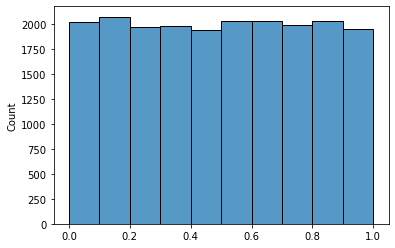

In [13]:
seed = jax.random.PRNGKey(20)
samples_shape = 20000
uniform_samples = jax.random.uniform(key = seed, shape = (samples_shape,))
sns.histplot(data=uniform_samples,bins =10)

<AxesSubplot:ylabel='Count'>

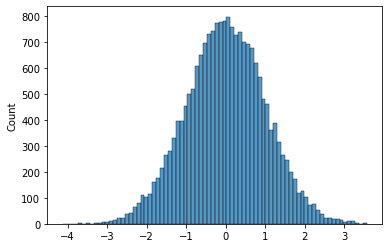

In [11]:
U_1 = uniform_samples[:int(samples_shape/2)]
U_2 = uniform_samples[int(samples_shape/2):]
X_1 = jnp.sqrt(-2*jnp.log(U_1))*jnp.cos(2*jnp.pi*U_2)
X_2 = jnp.sqrt(-2*jnp.log(U_1))*jnp.sin(2*jnp.pi*U_2)
X = jnp.concatenate([X_1,X_2],axis = 0)
sns.histplot(data = X)

## **Samples for general normal distribution $\mathcal{N}\sim(\mu, \sigma)$ from Box Muller Algorithm**


Suppose we have samples from standard normal distribution $\mathcal{N}\sim(0, 1)$ 

Then we can generate general normal distribution $\mathcal{N}\sim(\mu, \sigma)$ given by,

\begin{equation}
Y\ =\ \mu\ +\ \sigma X
\end{equation}
\begin{equation}
Where X \sim \mathcal{N}(0,1)
\end{equation}

## **Now lets do this programmatically** 

standard deviation for the dataset Y is 4.011034965515137


<AxesSubplot:ylabel='Count'>

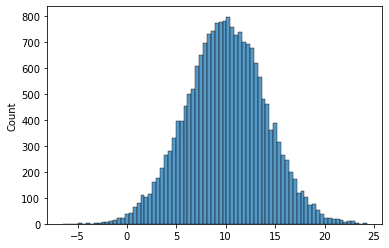

In [14]:
mu = 10
sigma = 4
Y = mu+X*sigma
print(f"standard deviation for the dataset Y is {jnp.sqrt(jax.numpy.var(Y))}")
sns.histplot(data = Y)

## **Why do we need normalization constant for normal distribution?**

\begin{equation}
P(x;\theta) = \frac1{\sqrt{2\pi\sigma^2}}{exp}^\frac{(x_i-\mu)^2}{-2\sigma^2}
\end{equation}

In the equation above $\frac1{\sqrt{2\pi\sigma^2}}$ is normalization constant. 



**But why do we need it???**


We need it to satisfy most basic property for a **PDF** that is

\begin{equation}
\int_{-\infty}^{\infty}P(x;\theta)d\theta = 1
\end{equation}

